<a href="https://colab.research.google.com/github/bdcollin/BasicAlgorithms/blob/master/drg_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
from oauth2client.client import GoogleCredentials

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import re
import warnings as warnings

In [0]:
drug_codes = pd.read_csv("/content/gdrive/Team Drives/CSC 505 Project 5/data/DRGCODES.csv")

In [0]:
drug_codes.head()

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
0,342,2491,144486,HCFA,28,"TRAUMATIC STUPOR & COMA, COMA <1 HR AGE >17 WI...",NaN,NaN
1,343,24958,162910,HCFA,110,MAJOR CARDIOVASCULAR PROCEDURES WITH COMPLICAT...,NaN,NaN
2,344,18325,153751,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN
3,345,17887,182692,HCFA,14,SPECIFIC CEREBROVASCULAR DISORDERS EXCEPT TRAN...,NaN,NaN
4,346,11113,157980,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN


In [0]:
drug_codes['DRG_TYPE'].unique()

array(['HCFA', 'APR ', 'MS'], dtype=object)

HCFA, APR

In [0]:
drug_codes['DRG_CODE'].nunique()

1667

In [0]:
drug_codes['SUBJECT_ID'].nunique()

46511

In [0]:
drug_codes['DRG_CODE'].isnull().values.any()

False

In [0]:
drug_codes['DRG_MORTALITY'].unique()

array([nan,  3.,  4.,  1.,  2.,  0.])

In [0]:
drug_codes['DRG_SEVERITY'].unique()

array([nan,  4.,  3.,  1.,  2.,  0.])

In [0]:
fixed_all = pd.read_csv("/content/gdrive/Team Drives/CSC 505 Project 5/data/FIXED_ALL_PATIENTS.txt")

In [0]:
fixed_all.head()

,Unnamed: 0,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,GENDER,DOB,AGE,PriorToRead
0,0,23.0,152223.0,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,M,2082-07-17 00:00:00,71.178082,0
1,1,23.0,124321.0,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,...,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,M,2082-07-17 00:00:00,75.304110,0
2,2,36.0,182104.0,2131-04-30 07:15:00,2131-05-08 14:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,M,2061-08-17 00:00:00,69.745205,1
3,3,36.0,122659.0,2131-05-12 19:49:00,2131-05-25 13:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,NOT SPECIFIED,MARRIED,WHITE,2131-05-12 17:26:00,2131-05-12 22:17:00,CHEST PAIN/SHORTNESS OF BREATH,M,2061-08-17 00:00:00,69.778082,0
4,4,36.0,165660.0,2134-05-10 11:30:00,2134-05-20 13:16:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,LONG TERM CARE HOSPITAL,Medicare,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,VENTRAL HERNIA/SDA,M,2061-08-17 00:00:00,72.775342,0


In [0]:
drug_codes.dtypes

ROW_ID             int64
SUBJECT_ID         int64
HADM_ID            int64
DRG_TYPE          object
DRG_CODE           int64
DESCRIPTION       object
DRG_SEVERITY     float64
DRG_MORTALITY    float64
dtype: object

In [0]:
drug_codes['HADM_ID'] = drug_codes['HADM_ID'].astype(float)

In [0]:
fixed_all.dtypes

Unnamed: 0              int64
SUBJECT_ID            float64
HADM_ID               float64
ADMITTIME              object
DISCHTIME              object
DEATHTIME              object
ADMISSION_TYPE         object
ADMISSION_LOCATION     object
DISCHARGE_LOCATION     object
INSURANCE              object
LANGUAGE               object
RELIGION               object
MARITAL_STATUS         object
ETHNICITY              object
EDREGTIME              object
EDOUTTIME              object
DIAGNOSIS              object
GENDER                 object
DOB                    object
AGE                   float64
PriorToRead             int64
dtype: object

In [0]:
drug_codes.dtypes

ROW_ID             int64
SUBJECT_ID         int64
HADM_ID          float64
DRG_TYPE          object
DRG_CODE           int64
DESCRIPTION       object
DRG_SEVERITY     float64
DRG_MORTALITY    float64
dtype: object

In [0]:
drug_codes_merged = drug_codes.merge(fixed_all, how='left', on='HADM_ID')
drug_codes_merged.head()

,ROW_ID,SUBJECT_ID_x,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY,Unnamed: 0,SUBJECT_ID_y,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,GENDER,DOB,AGE,PriorToRead
0,342,2491,144486.0,HCFA,28,"TRAUMATIC STUPOR & COMA, COMA <1 HR AGE >17 WI...",NaN,NaN,19808.0,2491.0,...,NaN,MARRIED,WHITE,2158-02-20 19:16:00,2158-02-20 23:40:00,S/P MVA,M,2082-07-02 00:00:00,75.687671,0.0
1,343,24958,162910.0,HCFA,110,MAJOR CARDIOVASCULAR PROCEDURES WITH COMPLICAT...,NaN,NaN,10232.0,24958.0,...,CATHOLIC,SINGLE,WHITE,2126-12-23 20:33:00,2126-12-24 02:36:00,CONGESTIVE HEART FAILURE;RULE-OUT MYOCARDIAL I...,F,2049-11-14 00:00:00,77.156164,0.0
2,344,18325,153751.0,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,345,17887,182692.0,HCFA,14,SPECIFIC CEREBROVASCULAR DISORDERS EXCEPT TRAN...,NaN,NaN,27585.0,17887.0,...,UNOBTAINABLE,WIDOWED,WHITE,2143-12-23 20:49:00,2143-12-24 03:00:00,INTER CRANIAL HEMORRHAGE,F,2062-08-22 00:00:00,81.391781,0.0
4,346,11113,157980.0,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
drug_codes_prior_0 = drug_codes_merged[drug_codes_merged['PriorToRead']==0]
drug_codes_prior_0.head()

,ROW_ID,SUBJECT_ID_x,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY,Unnamed: 0,SUBJECT_ID_y,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,GENDER,DOB,AGE,PriorToRead
0,342,2491,144486.0,HCFA,28,"TRAUMATIC STUPOR & COMA, COMA <1 HR AGE >17 WI...",NaN,NaN,19808.0,2491.0,...,NaN,MARRIED,WHITE,2158-02-20 19:16:00,2158-02-20 23:40:00,S/P MVA,M,2082-07-02 00:00:00,75.687671,0.0
1,343,24958,162910.0,HCFA,110,MAJOR CARDIOVASCULAR PROCEDURES WITH COMPLICAT...,NaN,NaN,10232.0,24958.0,...,CATHOLIC,SINGLE,WHITE,2126-12-23 20:33:00,2126-12-24 02:36:00,CONGESTIVE HEART FAILURE;RULE-OUT MYOCARDIAL I...,F,2049-11-14 00:00:00,77.156164,0.0
3,345,17887,182692.0,HCFA,14,SPECIFIC CEREBROVASCULAR DISORDERS EXCEPT TRAN...,NaN,NaN,27585.0,17887.0,...,UNOBTAINABLE,WIDOWED,WHITE,2143-12-23 20:49:00,2143-12-24 03:00:00,INTER CRANIAL HEMORRHAGE,F,2062-08-22 00:00:00,81.391781,0.0
6,348,15787,122380.0,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,26951.0,15787.0,...,JEWISH,MARRIED,WHITE,NaN,NaN,MITRA\MITRAL VALVE REPLACEMENT/SDA,F,2045-05-19 00:00:00,61.589041,0.0
7,349,13933,194891.0,HCFA,101,OTHER RESPIRATORY SYSTEM DIAGNOSES WITH COMPLI...,NaN,NaN,26379.0,13933.0,...,NOT SPECIFIED,SINGLE,WHITE,2107-12-08 22:55:00,2107-12-09 09:15:00,PNEUMONIA-FEVER-POST-OP,F,2079-04-10 00:00:00,28.682192,0.0


In [0]:
drug_codes_prior_1 = drug_codes_merged[drug_codes_merged['PriorToRead']==1]
drug_codes_prior_1.head()

,ROW_ID,SUBJECT_ID_x,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY,Unnamed: 0,SUBJECT_ID_y,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,GENDER,DOB,AGE,PriorToRead
174,83,16053,189195.0,HCFA,475,RESPIRATORY SYSTEM DIAGNOSIS WITH VENTILATOR S...,NaN,NaN,7118.0,16053.0,...,CATHOLIC,MARRIED,WHITE,2112-04-20 09:17:00,2112-04-20 18:30:00,PNEUMONIA; COPD,M,2056-04-16 00:00:00,56.046575,1.0
245,154,9736,160259.0,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,2864.0,9736.0,...,GREEK ORTHODOX,MARRIED,WHITE,NaN,NaN,AORTIC STENOSIS\BENTALL PROCEDURE/SDA,M,2115-06-02 00:00:00,69.010959,1.0
263,172,11216,119632.0,HCFA,109,CORONARY BYPASS WITHOUT CARDIAC CATHETER,NaN,NaN,5401.0,11216.0,...,CATHOLIC,MARRIED,WHITE,2134-03-24 10:17:00,2134-03-24 16:30:00,UNSTABLE ANGINA\CORONARY ARTERY BYPASS GRAFT,M,2066-10-28 00:00:00,67.446575,1.0
354,263,16013,174375.0,HCFA,88,CHRONIC OBSTRUCTIVE PULMONARY DISEASE,NaN,NaN,5933.0,16013.0,...,CATHOLIC,WIDOWED,HISPANIC OR LATINO,2129-06-10 18:41:00,2129-06-10 23:51:00,CHEST PAIN,F,2042-12-20 00:00:00,86.528767,1.0
401,310,24889,143265.0,HCFA,467,OTHER FACTORS INFLUENCING HEALTH STATUS,NaN,NaN,9795.0,24889.0,...,CATHOLIC,NaN,HISPANIC OR LATINO,NaN,NaN,PREMATURITY,F,2196-01-06 00:00:00,0.115068,1.0


In [0]:
dcp0_gb = drug_codes_prior_0.groupby('DRG_TYPE')
dcp0_gb.count()

,ROW_ID,SUBJECT_ID_x,HADM_ID,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY,Unnamed: 0,SUBJECT_ID_y,ADMITTIME,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,GENDER,DOB,AGE,PriorToRead
DRG_TYPE,,,,,,,,,,,,,,,,,,,,,
APR,57250,57250,57250,57250,57249,57250,57250,57250,57250,57250,...,57250,55092,57250,35969,35969,57249,57250,57250,57250,57250
HCFA,22667,22667,22667,22667,22619,0,0,22667,22667,22667,...,22238,21121,22667,12195,12195,22664,22667,22667,22667,22667
MS,24274,24274,24274,24274,24262,0,0,24274,24274,24274,...,24274,23404,24274,15444,15444,24274,24274,24274,24274,24274


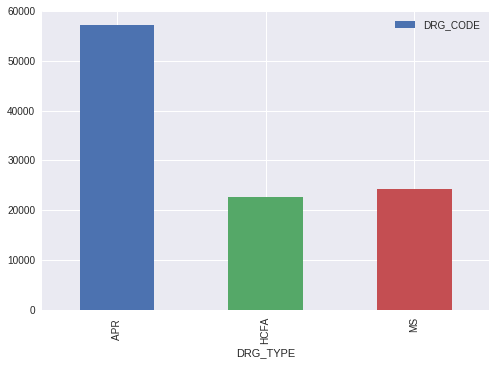

In [0]:
prior_0_bargraph = dcp0_gb.count().plot.bar(y='DRG_CODE')

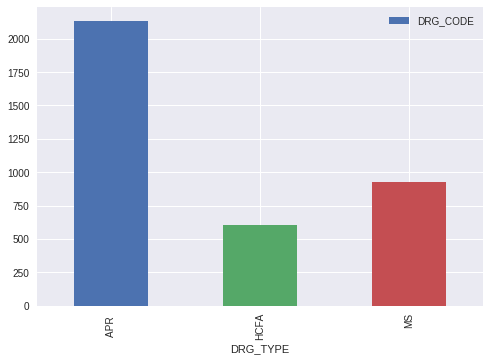

In [0]:
dcp1_gb = drug_codes_prior_1.groupby('DRG_TYPE')
prior_1_bargraph = dcp1_gb.count().plot.bar(y='DRG_CODE')

In [0]:
temp = dcp1_gb['DRG_CODE'].count()
temp = temp.rename("Readmissions")
summ = temp.sum()
temp = (temp/summ)*100
temp

DRG_TYPE
APR     58.206107
HCFA    16.521265
MS      25.272628
Name: Readmissions, dtype: float64

In [0]:
temp2 = dcp0_gb['DRG_CODE'].count()
temp2 = temp2.rename("Non-Readmissions")
summ2 = temp2.sum()
temp2 = (temp2/summ2)*100
temp2

DRG_TYPE
APR     54.947164
HCFA    21.755238
MS      23.297598
Name: Non-Readmissions, dtype: float64

In [0]:
observed = pd.concat([temp, temp2], axis=1)
observed = observed.rename(index=str, columns = {observed.columns[0]:"Readmissions"})
observed

,Readmissions,Non-Readmissions
DRG_TYPE,,
APR,58.206107,54.947164
HCFA,16.521265,21.755238
MS,25.272628,23.297598


In [0]:
expected1 = (temp.sum()*(temp+temp2))/((temp.sum())+(temp2.sum()))
expected1 = expected1.rename("Readmissions")

expected2 = (temp2.sum()*(temp+temp2))/((temp.sum())+(temp2.sum()))
expected2 = expected2.rename("Non-Readmissions")

expected = pd.concat([expected1,expected2],axis=1)
expected

,Readmissions,Non-Readmissions
DRG_TYPE,,
APR,56.576636,56.576636
HCFA,19.138251,19.138251
MS,24.285113,24.285113


In [0]:
chiSquareStat = (((observed-expected)**2)/expected).sum().sum()
chiSquareStat

0.8898721685853808

In [0]:
import scipy.stats as stats
stats.chisquare(f_obs = observed,f_exp = expected)

Power_divergenceResult(statistic=array([0.44493608, 0.44493608]), pvalue=array([0.80054059, 0.80054059]))

In [0]:
drug_codes_prior_0.shape, drug_codes_prior_1.shape

((104191, 28), (3668, 28))

In [0]:
ml = drug_codes_prior_1.append(drug_codes_prior_0.sample(n=3668))

In [0]:
ml.columns.values

array(['ROW_ID', 'SUBJECT_ID_x', 'HADM_ID', 'DRG_TYPE', 'DRG_CODE',
       'DESCRIPTION', 'DRG_SEVERITY', 'DRG_MORTALITY', 'Unnamed: 0',
       'SUBJECT_ID_y', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME',
       'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION',
       'INSURANCE', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY',
       'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS', 'GENDER', 'DOB', 'AGE',
       'PriorToRead'], dtype=object)

In [0]:
ml = ml.drop(['ROW_ID', 'SUBJECT_ID_x', 'HADM_ID', 'DESCRIPTION','Unnamed: 0', 'SUBJECT_ID_y', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME','ADMISSION_TYPE', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION','EDREGTIME', 'EDOUTTIME', 'DOB'], axis=1)

In [0]:
ml.dtypes

DRG_TYPE           object
DRG_CODE            int64
DRG_SEVERITY      float64
DRG_MORTALITY     float64
INSURANCE          object
LANGUAGE           object
RELIGION           object
MARITAL_STATUS     object
ETHNICITY          object
DIAGNOSIS          object
GENDER             object
AGE               float64
PriorToRead       float64
dtype: object

In [0]:
ml = ml.fillna(value=-1.0)

In [0]:
ml.shape

(7336, 13)

In [0]:
drug_codes_merged.to_csv('drug_codes.csv')

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ml.columns:
  if ml[col].dtypes == type(object): 
    ml[col] = le.fit_transform(ml[col].astype(str))

In [0]:
from sklearn.model_selection import train_test_split
x = ml.drop(["PriorToRead"], axis =1 )
y = ml["PriorToRead"]

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5868, 12), (1468, 12), (5868,), (1468,))

In [0]:
from sklearn.ensemble import RandomForestClassifier

RandFor = RandomForestClassifier(n_estimators = 100, max_depth=None, random_state = 0)
RandFor.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
RandFor.score(x_test, y_test)

0.715258855585831

             precision    recall  f1-score   support

        0.0       0.69      0.72      0.71       702
        1.0       0.74      0.71      0.72       766

avg / total       0.72      0.72      0.72      1468

[[508 194]
 [224 542]]


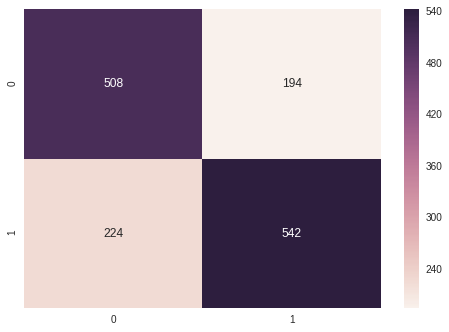

In [0]:
from sklearn import metrics
import seaborn as sns

predRandFor = RandFor.predict(x_test)

print(metrics.classification_report(y_test, predRandFor))
print(metrics.confusion_matrix(y_test, predRandFor))

sns.heatmap(metrics.confusion_matrix(y_test, predRandFor), annot=True, fmt="d")

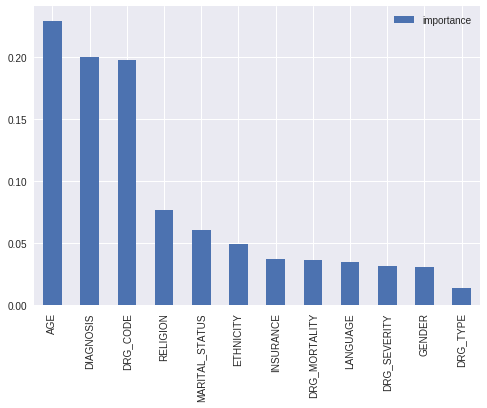

In [0]:
features = pd.DataFrame(RandFor.feature_importances_, index=x_train.columns, columns=["importance"]).sort_values('importance',ascending=False)
features.plot.bar()